<a href="https://colab.research.google.com/github/ProgrammingWithGaurav/Blog-app/blob/master/Apple_vs_Banana_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d marquis03/fruits-100

 99% 618M/627M [00:07<00:00, 110MB/s]
100% 627M/627M [00:07<00:00, 88.5MB/s]


In [4]:
!ls

fruits-100.zip	kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = '/content/fruits-100.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()


In [6]:
!ls

classname.txt	kaggle.json  test      train	  val
fruits-100.zip	sample_data  test.csv  train.csv  val.csv


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

# Load all the array from the dataset to train all the fruits images

In [2]:
fruits = os.listdir('/content/train/')
fruits.sort()
fruits = fruits[0:21]
len(fruits)

21

In [3]:
fruits

['.ipynb_checkpoints',
 'abiu',
 'acai',
 'acerola',
 'ackee',
 'ambarella',
 'apple',
 'apricot',
 'avocado',
 'banana',
 'barbadine',
 'barberry',
 'betel_nut',
 'bitter_gourd',
 'black_berry',
 'black_mullberry',
 'brazil_nut',
 'camu_camu',
 'cashew',
 'cempedak',
 'chenet']

In [4]:
sample = os.listdir(f'/content/train/{fruits[0]}')
print(fruits[0])
sample[0:10]

.ipynb_checkpoints


[]

In [5]:
# Remove the first element
fruits = fruits[1:]

In [6]:
len(fruits)

20

In [7]:
labels = []
for i in range(len(fruits)):
  fruit = [i] * 400
  labels += fruit

In [8]:
len(labels)

8000

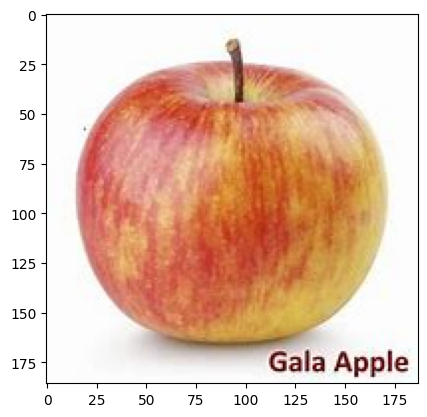

In [9]:
img = mpimg.imread('/content/train/apple/20.jpg')
implot = plt.imshow(img)
plt.show()

In [10]:
data = []

In [11]:
fruits_path = '/content/train/'

for fruit in fruits:
  fruit_path = fruits_path + fruit + '/'
  fruit_in_fruits = os.listdir(fruit_path)
  for img_file in fruit_in_fruits:
    image = Image.open(fruit_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)

    data.append(image)


In [12]:
len(data)

8000

In [13]:
X = np.array(data)
Y = np.array(labels)

In [14]:
X.shape

(8000, 128, 128, 3)

In [15]:
X_flat = X.reshape((X.shape[0], -1))

In [16]:
X_flat.shape

(8000, 49152)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.1, random_state=42)

In [18]:
y_train[100]

1

In [19]:
# feature scaling
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train_scaled, y_train)

In [28]:
from sklearn.metrics import accuracy_score
# On Training Data
train_pred = model.predict(x_train_scaled)
train_acc = accuracy_score(y_train, train_pred)

# On Test Data
test_pred = model.predict(x_test_scaled)
test_acc = accuracy_score(y_test, test_pred)


In [ ]:
train_acc, test_acc

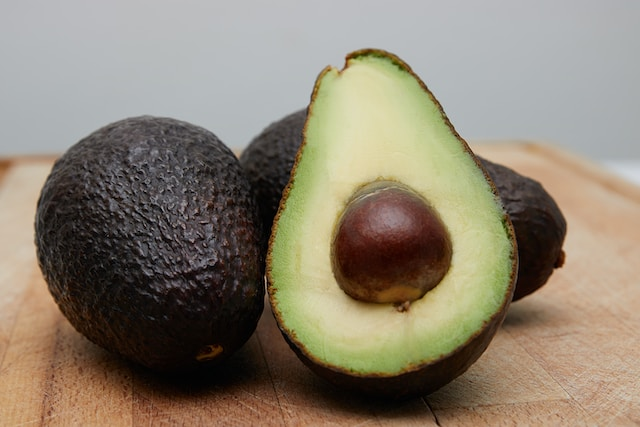

[1]


'acai'

In [30]:
# @title Predictive System
input_image_path = "test.jpg" # @param {type:"string"}
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_reshaped = np.reshape(input_image_resized, [1,128, 128, 3])
input_image_flatten = input_image_reshaped.reshape((input_image_reshaped.shape[0], -1))
input_image_scaled = input_image_flatten/255

input_pred = model.predict(input_image_scaled)
print(input_pred)
fruits[input_pred[0]]

In [24]:
fruits[10]

'barberry'

In [25]:
fruits

['abiu',
 'acai',
 'acerola',
 'ackee',
 'ambarella',
 'apple',
 'apricot',
 'avocado',
 'banana',
 'barbadine',
 'barberry',
 'betel_nut',
 'bitter_gourd',
 'black_berry',
 'black_mullberry',
 'brazil_nut',
 'camu_camu',
 'cashew',
 'cempedak',
 'chenet']